In [1]:
from copy import deepcopy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from heatmapcluster import heatmapcluster
import csv

filepath = '../../hugo_6ormoretp-6fpDATLOW.csv'
dataMatrix = pd.read_csv(filepath, index_col=0)
dataMatrix.loc[dataMatrix['class'] == 2.0, 'class'] = -1.0


colorstore = {}
for index, row in dataMatrix.iterrows():
    if(row['class'] == 1.0):
        colorstore[index] = "green"
    else:
        colorstore[index] = "red"
colorstore

{'TCGA-A6-2670': 'red',
 'TCGA-A6-2672': 'green',
 'TCGA-A6-2674': 'red',
 'TCGA-A6-2676': 'green',
 'TCGA-A6-2677': 'red',
 'TCGA-A6-2678': 'red',
 'TCGA-A6-2683': 'red',
 'TCGA-A6-3807': 'red',
 'TCGA-A6-3808': 'red',
 'TCGA-A6-3810': 'red',
 'TCGA-AA-3514': 'red',
 'TCGA-AA-3516': 'green',
 'TCGA-AA-3517': 'red',
 'TCGA-AA-3518': 'green',
 'TCGA-AA-3519': 'red',
 'TCGA-AA-3520': 'red',
 'TCGA-AA-3521': 'red',
 'TCGA-AA-3522': 'red',
 'TCGA-AA-3524': 'red',
 'TCGA-AA-3525': 'green',
 'TCGA-AA-3526': 'red',
 'TCGA-AA-3527': 'red',
 'TCGA-AA-3529': 'red',
 'TCGA-AA-3530': 'red',
 'TCGA-AA-3531': 'red',
 'TCGA-AA-3532': 'red',
 'TCGA-AA-3534': 'red',
 'TCGA-AA-3538': 'red',
 'TCGA-AA-3542': 'red',
 'TCGA-AA-3543': 'green',
 'TCGA-AA-3544': 'red',
 'TCGA-AA-3548': 'red',
 'TCGA-AA-3549': 'red',
 'TCGA-AA-3552': 'red',
 'TCGA-AA-3553': 'red',
 'TCGA-AA-3554': 'red',
 'TCGA-AA-3555': 'red',
 'TCGA-AA-3556': 'red',
 'TCGA-AA-3558': 'red',
 'TCGA-AA-3560': 'red',
 'TCGA-AA-3561': 'red',
 'TC

In [2]:
#make it so we only see CIMP-High
dataMatrix = dataMatrix[dataMatrix['class'] == 1.0]

dataMatrix = dataMatrix.drop('class',1)


dataMatrix = dataMatrix.transpose()
print("shape: ",dataMatrix.shape[0],dataMatrix.shape[1])
#dataMatrix = dataMatrix.loc[:, (dataMatrix != 0).any(axis=0)]

dataMatrix

shape:  44 32


,TCGA-A6-2672,TCGA-A6-2676,TCGA-AA-3516,TCGA-AA-3518,TCGA-AA-3525,TCGA-AA-3543,TCGA-AA-3664,TCGA-AA-3672,TCGA-AA-3710,TCGA-AA-3715,...,TCGA-AA-A00E,TCGA-AA-A00J,TCGA-AA-A01P,TCGA-AA-A022,TCGA-AA-A029,TCGA-AA-A02O,TCGA-AA-A03F,TCGA-AG-3575,TCGA-AG-3600,TCGA-AG-A02X
ADCY5,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
BRAF,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
DIP2C,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SALL2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
THBS1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CDH16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
MBTPS1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SIGLEC8,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BCR,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TBC1D22A,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


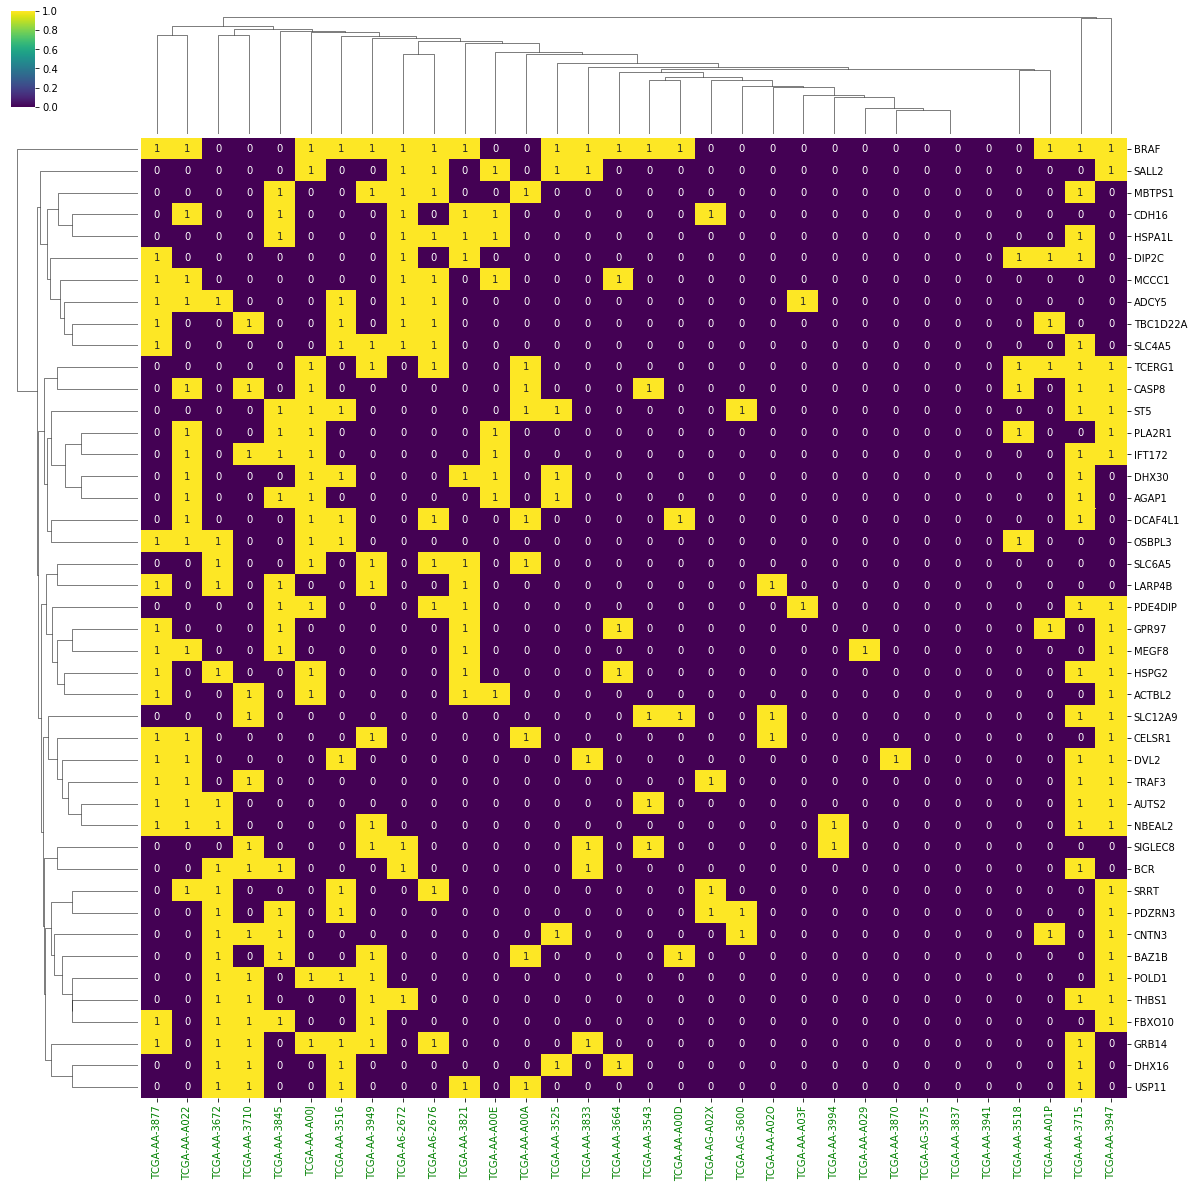

In [3]:
g = sns.clustermap(dataMatrix, figsize=(20,20), yticklabels=True, annot=True, fmt="g", cmap='viridis')
for tick_label in g.ax_heatmap.axes.get_xticklabels():
    ttxt = tick_label.get_text()
    tick_label.set_color(colorstore[ttxt])
plt.show()